## Predecir los ingresos diarios en Dolares

### Importando Librerias

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as ptl

### Importando Datos

In [3]:
datos_df = pd.read_csv("datos_de_ventas.csv", sep=',')
datos_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


### Visualizacion

<Axes: xlabel='Temperature', ylabel='Revenue'>

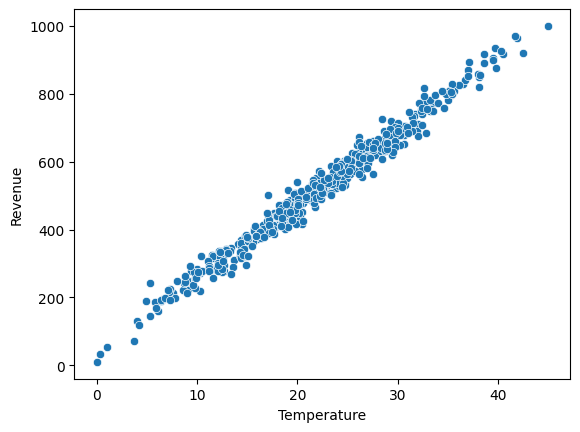

In [4]:
sns.scatterplot(
    x=datos_df["Temperature"],
    y=datos_df["Revenue"]
)

### Creando set de Entrenamiento

In [5]:
X_train = datos_df['Temperature']
Y_train = datos_df['Revenue']

### Creando el modelo

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

c:\Users\Richard Rivera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

### Entrenando modelo

In [9]:
spochs_hist = model.fit(
    X_train,
    Y_train,
    epochs=1000
)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 288117.6250  
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240692.7344 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219670.8125 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 175568.1094 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 152968.7656 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126721.1250 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103432.3125 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88345.5625 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70398.8672 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58121.5664 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47325.4062
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38392.6562 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29913.4297 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [10]:
keys = spochs_hist.history.keys()
keys

dict_keys(['loss'])

### Grafico de entrenamiento del modelo

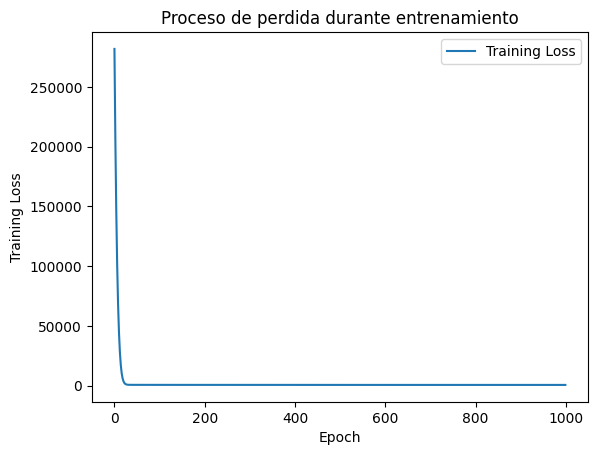

In [14]:
ptl.plot(spochs_hist.history['loss'])
ptl.title('Proceso de perdida durante entrenamiento')
ptl.xlabel('Epoch')
ptl.ylabel('Training Loss')
ptl.legend(['Training Loss'])

In [15]:
weings = model.get_weights()
weings

[array([[21.487911]], dtype=float32), array([44.932816], dtype=float32)]

### Prediccion

In [18]:
Temp = np.array([5])

In [19]:
Revenue = model.predict([Temp])
print("La ganancia segun la red neuronal es: ", Revenue, "$")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
La ganancia segun la red neuronal es:  [[152.37238]] $


### Grafico de prediccion

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


Text(0, 0.5, 'Ganancia [Dolares]')

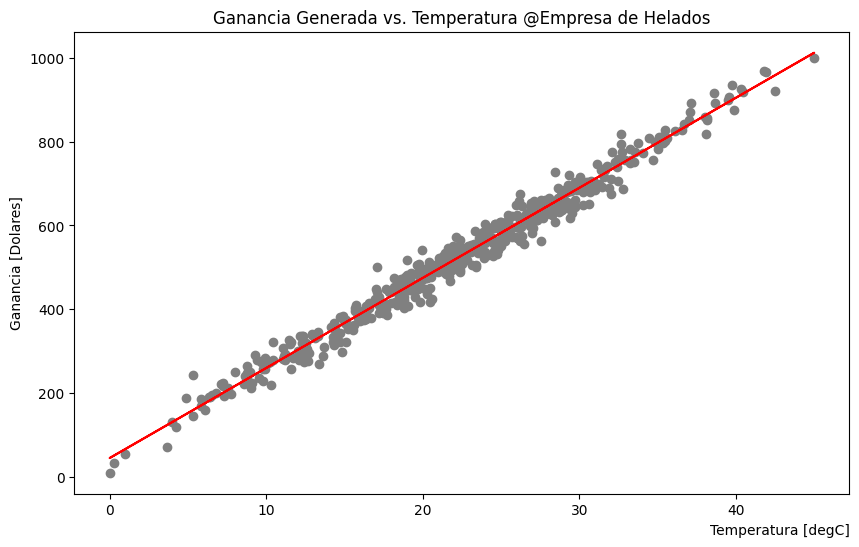

In [26]:
ptl.figure(figsize=(10,6))
ptl.scatter(
    X_train,
    Y_train,
    color='gray'
)
ptl.plot(
    X_train,
    model.predict(X_train),
    color='red'
)
ptl.title('Ganancia Generada vs. Temperatura @Empresa de Helados')
ptl.xlabel('Temperatura [degC]', loc='right')
ptl.ylabel('Ganancia [Dolares]')